Albert Vasquez<br>
DigHum100<br>
June 28 2022

In [1]:
pip install wordcloud # word cloud library https://github.com/amueller/word_cloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


In [ ]:
from os import path
import os
from PIL import Image
import music
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Retrieved music data from https://corgis-edu.github.io/corgis/python/music/

In [ ]:
music = music.get_music() #retrieved the music dataset using the python file

In [ ]:
#Turned the dataset from a nested dictionary format into a format usable for EDA using pandas
song = pd.DataFrame(i['song'] for i in music)
artist = pd.DataFrame(i['artist'] for i in music)
release = pd.DataFrame(i['release'] for i in music)

In [ ]:
song

,artist_mbtags,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,end_of_fade_in,hotttnesss,id,...,mode,mode_confidence,start_of_fade_out,tatums_confidence,tatums_start,tempo,time_signature,time_signature_confidence,title,year
0,0.0,0.0,0.643,0.58521,0.834,0.58521,218.93179,0.247,0.602120,SOMZWCG12A8C13C480,...,0,0.636,218.932,0.779,0.28519,92.198,4.0,0.778,0,0
1,0.0,1.0,0.007,0.71054,1.000,0.20627,148.03546,0.148,-1.000000,SOCIWDW12A8C13D406,...,0,0.430,137.915,0.969,0.20627,121.274,4.0,0.384,0,1969
2,0.0,0.0,0.980,0.73152,0.980,0.73152,177.47546,0.282,-1.000000,SOXVLOJ12AB0189215,...,1,0.565,172.304,0.482,0.42132,100.070,1.0,0.000,0,0
3,0.0,1.0,0.017,1.30621,0.809,0.81002,233.40363,0.000,-1.000000,SONHOTT12A8C13493C,...,1,0.749,217.124,0.601,0.56254,119.293,4.0,0.000,0,1982
4,0.0,0.0,0.175,1.06368,0.883,0.13576,209.60608,0.066,0.604501,SOFSOCN12A8C143F5D,...,1,0.371,198.699,1.000,0.13576,129.738,4.0,0.562,0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.0,0.460,0.87991,0.719,0.44279,386.19383,0.177,0.594080,SOLXXPY12A67ADABA0,...,1,0.540,386.194,0.224,0.22262,140.185,4.0,0.099,0,1998
9996,0.0,1.0,0.103,1.63576,0.936,0.07692,168.01914,0.403,0.334707,SOAYONI12A6D4F85C8,...,1,0.398,163.463,0.604,0.07692,77.072,3.0,0.597,0,1998
9997,0.0,0.0,0.003,0.78745,1.000,0.27924,193.72363,0.173,-1.000000,SOJZLAJ12AB017E8A2,...,1,0.565,186.015,1.000,0.27924,118.123,4.0,0.205,0,0
9998,0.0,0.0,0.542,0.28192,0.574,0.28192,300.82567,0.000,0.000000,SORZSCJ12A8C132446,...,1,0.503,300.826,0.421,0.28192,137.663,4.0,0.000,0,0


In [ ]:
release

,id,name
0,300848,0
1,300822,0
2,514953,0
3,287650,0
4,611336,0
...,...,...
9995,691752,0
9996,41649,0
9997,346402,0
9998,86259,0


In [ ]:
artist

,familiarity,hotttnesss,id,latitude,location,longitude,name,similar,terms,terms_freq
0,0.581794,0.401998,ARD7TVE1187B99BFB1,0.00000,0,0.00000,Casual,0.0,hip hop,1.000000
1,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,0,-90.04892,The Box Tops,0.0,blue-eyed soul,1.000000
2,0.487357,0.343428,ARKRRTF1187B9984DA,0.00000,0,0.00000,Sonora Santanera,0.0,salsa,1.000000
3,0.630382,0.454231,AR7G5I41187FB4CE6C,0.00000,0,0.00000,Adam Ant,0.0,pop rock,0.988584
4,0.651046,0.401724,ARXR32B1187FB57099,0.00000,0,0.00000,Gob,0.0,pop punk,0.887288
...,...,...,...,...,...,...,...,...,...,...
9995,0.722571,0.499826,AR4C6V01187FB3BAF4,39.55792,0,-7.84481,Moonspell,0.0,sympho black metal,0.999765
9996,0.511663,0.409779,AR9JLBU1187B9AAEC4,-33.96243,0,25.62326,Danny Williams,0.0,ballad,0.915417
9997,0.433508,0.289903,ARS1DCR1187B9A4A56,0.00000,0,0.00000,Winston Reedy,0.0,lovers rock,0.960115
9998,0.334457,0.216829,ARAGMIV11F4C843F78,0.00000,0,0.00000,"Myrick ""Freeze"" Guillory",0.0,zydeco,1.000000


# Goal: Find overall top songs, then use the corresponding genres to create the wordcloud.

In [ ]:
artists_sorted = artist.sort_values('hotttnesss', ascending=False).head(100) # sorted songs by overall 'hotttnesss'

In [ ]:
artists_sorted

,familiarity,hotttnesss,id,latitude,location,longitude,name,similar,terms,terms_freq
8464,0.877214,1.082503,ARRH63Y1187FB47783,0.0,0,0.0,Kanye West,0.0,hip hop,1.000000
4989,0.877214,1.082503,ARRH63Y1187FB47783,0.0,0,0.0,Kanye West / Lupe Fiasco,0.0,hip hop,1.000000
2376,0.877214,1.082503,ARRH63Y1187FB47783,0.0,0,0.0,Kanye West / Adam Levine,0.0,hip hop,1.000000
7331,0.877214,1.082503,ARRH63Y1187FB47783,0.0,0,0.0,Kanye West,0.0,hip hop,1.000000
7275,0.877214,1.082503,ARRH63Y1187FB47783,0.0,0,0.0,Kanye West,0.0,hip hop,1.000000
...,...,...,...,...,...,...,...,...,...,...
3336,0.849447,0.794248,ARDCFNZ1187FB3DDB0,0.0,0,0.0,Enrique Iglesias,0.0,dance pop,1.000000
1036,0.842972,0.793413,ARML3X41187FB35F2E,0.0,0,0.0,Jason Mraz,0.0,alternative rock,0.999872
3489,0.842972,0.793413,ARML3X41187FB35F2E,0.0,0,0.0,Jason Mraz,0.0,alternative rock,0.999872
3464,0.842972,0.793413,ARML3X41187FB35F2E,0.0,0,0.0,Jason Mraz,0.0,alternative rock,0.999872


In [ ]:
artists_sorted['terms'] = artists_sorted['terms'].replace(' ', '', regex=True) #remove spaces from genres because our word cloud library doesnt like them

In [ ]:
artists_sorted

,familiarity,hotttnesss,id,latitude,location,longitude,name,similar,terms,terms_freq
8464,0.877214,1.082503,ARRH63Y1187FB47783,0.0,0,0.0,Kanye West,0.0,hiphop,1.000000
4989,0.877214,1.082503,ARRH63Y1187FB47783,0.0,0,0.0,Kanye West / Lupe Fiasco,0.0,hiphop,1.000000
2376,0.877214,1.082503,ARRH63Y1187FB47783,0.0,0,0.0,Kanye West / Adam Levine,0.0,hiphop,1.000000
7331,0.877214,1.082503,ARRH63Y1187FB47783,0.0,0,0.0,Kanye West,0.0,hiphop,1.000000
7275,0.877214,1.082503,ARRH63Y1187FB47783,0.0,0,0.0,Kanye West,0.0,hiphop,1.000000
...,...,...,...,...,...,...,...,...,...,...
3336,0.849447,0.794248,ARDCFNZ1187FB3DDB0,0.0,0,0.0,Enrique Iglesias,0.0,dancepop,1.000000
1036,0.842972,0.793413,ARML3X41187FB35F2E,0.0,0,0.0,Jason Mraz,0.0,alternativerock,0.999872
3489,0.842972,0.793413,ARML3X41187FB35F2E,0.0,0,0.0,Jason Mraz,0.0,alternativerock,0.999872
3464,0.842972,0.793413,ARML3X41187FB35F2E,0.0,0,0.0,Jason Mraz,0.0,alternativerock,0.999872


In [ ]:
artists_sorted['name'] = artists_sorted['name'].replace('/', '', regex=True) #remove the slashes out of artist names

In [ ]:
artists_sorted

,familiarity,hotttnesss,id,latitude,location,longitude,name,similar,terms,terms_freq
8464,0.877214,1.082503,ARRH63Y1187FB47783,0.0,0,0.0,Kanye West,0.0,hiphop,1.000000
4989,0.877214,1.082503,ARRH63Y1187FB47783,0.0,0,0.0,Kanye West Lupe Fiasco,0.0,hiphop,1.000000
2376,0.877214,1.082503,ARRH63Y1187FB47783,0.0,0,0.0,Kanye West Adam Levine,0.0,hiphop,1.000000
7331,0.877214,1.082503,ARRH63Y1187FB47783,0.0,0,0.0,Kanye West,0.0,hiphop,1.000000
7275,0.877214,1.082503,ARRH63Y1187FB47783,0.0,0,0.0,Kanye West,0.0,hiphop,1.000000
...,...,...,...,...,...,...,...,...,...,...
3336,0.849447,0.794248,ARDCFNZ1187FB3DDB0,0.0,0,0.0,Enrique Iglesias,0.0,dancepop,1.000000
1036,0.842972,0.793413,ARML3X41187FB35F2E,0.0,0,0.0,Jason Mraz,0.0,alternativerock,0.999872
3489,0.842972,0.793413,ARML3X41187FB35F2E,0.0,0,0.0,Jason Mraz,0.0,alternativerock,0.999872
3464,0.842972,0.793413,ARML3X41187FB35F2E,0.0,0,0.0,Jason Mraz,0.0,alternativerock,0.999872


In [ ]:
np.savetxt(r'artists.txt', artists_sorted.terms, fmt = '%s') #save the 'terms' column (Genre) as a .txt to feed into the word cloud library

In [ ]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
genre_artist_text = open(path.join(d, 'genre-only-long.txt')).read()

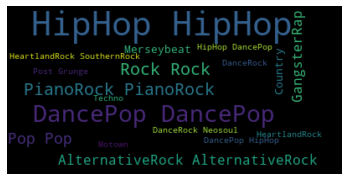

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud()
wordcloud = wordcloud.generate(genre_artist_text)
wordcloud = WordCloud(max_font_size=40).generate(genre_artist_text)


# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_map_genre_long.svg', format='svg', dpi=1200)
plt.show()

#Experiment: Attempt to create word cloud of most popular artist in our dataset (Kanye West)

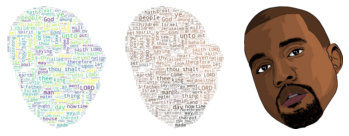

In [ ]:

# get data directory path 
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text
text = open(path.join(d, 'test_text.txt')).read()

# read the mask / color image taken from
alice_coloring = np.array(Image.open(path.join(d, "kanye_head_white.png")))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=5000, mask=alice_coloring,
               stopwords=stopwords, max_font_size=40, random_state=42)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

# show
fig, axes = plt.subplots(1, 3)
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.savefig('white_kanye_test.png', dpi=500)
plt.show()